In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from scipy.io import loadmat
import scipy.linalg as linalg

import scipy.stats as st
from scipy.stats import norm, chi2, probplot, chi2_contingency, skew, kurtosis, t, levene, ttest_ind

# Exercice à partir de données synthétiques

Dans cet exercice, nous allons nous même engendrer les données afin d'expérimenter le theorème de la limite centrale (ou TCL).

Le théorème de la limite centrale, de façon informelle, donne une estimation précise de l'erreur que l'on commet en approchant l'espérance mathématique par la moyenne arithmétique (historiquement nommé théorème des erreurs par Gauss).

Soit $X_n$ une suite de v.a. de même loi d'espérance $\mu$ et d'écart type $\sigma$. Alors la v.a.
$$ Z_n = \frac{(X_1 + \cdots + X_n) -n\mu}{\sigma\sqrt{n}} \longrightarrow \mathcal{N}(0,1)$$

dit autrement:

$$ \frac{(X_1 + \cdots + X_n)}{n} \longrightarrow \mathcal{N}(\mu,\frac{\sigma}{\sqrt{n}})$$

et aussi:
$$ (X_1 + \cdots + X_n) \longrightarrow \mathcal{N}(n\mu,\sigma\sqrt{n})$$

    

Prenons $n$ échantillons au hasard dans une population telle que la caractéristique observée est normée centrée.

In [ ]:
n = 10
samples = np.random.randn(n)
samples.mean()

np.float64(-0.26016545561149096)

La moyenne n'est pas proche de 0 ! Ainsi on observant que ces $n$ valeurs, notre estimation de la moyenne n'est pas très bonne. Mais c'est peut être qu'on a pas eu de chance.  Alors recommençons ! Dans ce cas l'estimateur de la moyenne d'après un échantillonage de $n$ valeur devient lui même une variable aléatoire.

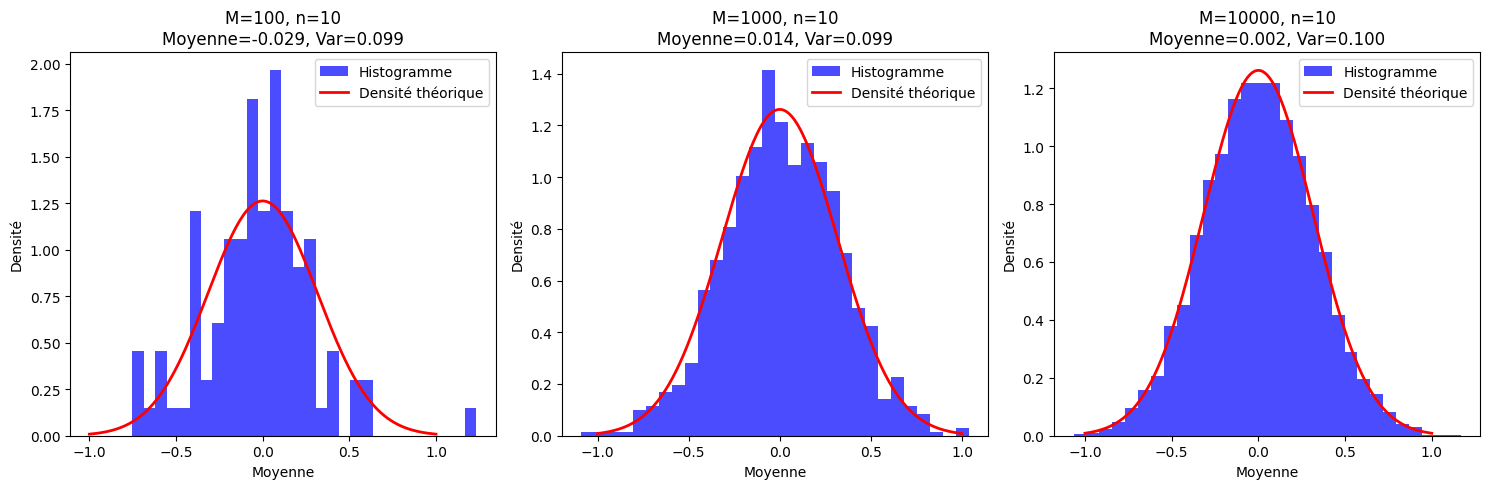

In [ ]:
n = 10
Ms = [100, 1000, 10000]

sigma = 1  # données centrées réduites
theo_std = sigma / np.sqrt(n)

x = np.linspace(-1, 1, 200)  # plage centrée autour de 0

plt.figure(figsize=(15, 5))

for i, M in enumerate(Ms):
    samples = np.random.randn(M, n)
    means = samples.mean(axis=1)

    plt.subplot(1, 3, i+1)
    plt.hist(means, bins=30, density=True, alpha=0.7, color='blue', label="Histogramme")
    plt.plot(x, norm.pdf(x, 0, theo_std), 'r-', lw=2, label="Densité théorique")
    plt.title(f"M={M}, n={n}\nMoyenne={means.mean():.3f}, Var={means.var():.3f}")
    plt.xlabel("Moyenne")
    plt.ylabel("Densité")
    plt.legend()

plt.tight_layout()
plt.show()

L'estimation est une somme de $n=10$ variables aléatoires , chacune normale et normalisée sur $n$. Une somme de gaussienne avec même variance, reste une gaussienne.

On voit que sur 100 échantillonnages différents (chacun prenant 10 valeurs),  l'estimation de la moyenne est très incertaine. Si on augmente $n$ est-ce  que serait mieux ?

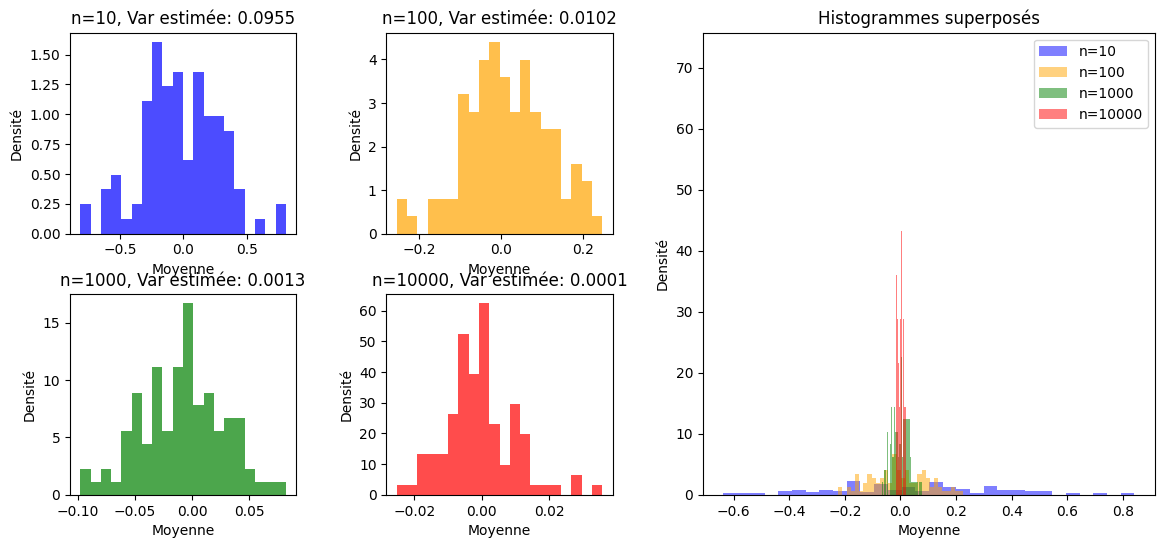

In [ ]:
# Cette fois  M est fixé à 100
# Et n varie : 10, 100, 1000, 10000
# Tracer l'histogramme des estimations pour chaque n.

M = 100
ns = [10, 100, 1000, 10000]
colors = ['blue', 'orange', 'green', 'red']

fig = plt.figure(figsize=(14, 6))
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 2], wspace=0.3, hspace=0.3)

# Histogrammes séparés (2x2) à gauche (occupent les 4 premières cases de la grille)
for i, n in enumerate(ns):
    ax = fig.add_subplot(gs[i // 2, i % 2])
    samples = np.random.randn(M, n)
    means = samples.mean(axis=1)
    ax.hist(means, bins=20, density=True, alpha=0.7, color=colors[i])
    ax.set_title(f"n={n}, Var estimée: {means.var():.4f}")
    ax.set_xlabel("Moyenne")
    ax.set_ylabel("Densité")

# Histogramme superposé à droite (colonne 3, sur les 2 lignes)
ax_superpose = fig.add_subplot(gs[:, 2])
for n, color in zip(ns, colors):
    samples = np.random.randn(M, n)
    means = samples.mean(axis=1)
    ax_superpose.hist(means, bins=30, density=True, alpha=0.5, color=color, label=f'n={n}')

ax_superpose.set_title("Histogrammes superposés")
ax_superpose.set_xlabel("Moyenne")
ax_superpose.set_ylabel("Densité")
ax_superpose.legend()

plt.show()

On voit que la variance de l'estimateur diminue avec $n$

Toute la question est alors: à partir de mon échantillon, mon estimation de la moyenne est-elle fiable ou pas. On peut alors choisir non pas d'estimer cette moyenne mais de déterminer un intervalle de confiance.  

## Intervalle de confiance

De manière générale, le paramètre à estimer à partir d'un échantillon est $\theta$:
- Soit $\alpha \in ]0, 1[$ le niveau de risque.
- S’il existe des v.a.r $\theta_{min}(X1, . . . , Xn)$ et $\theta_{max}(X1, . . . , Xn)$
 telles que
 $$ P(\theta \in [\theta_{min}, \theta_{max}]) = 1 − \alpha$$

On dit alors que $[\theta_{min}, \theta_{max}]$ est un intervalle de
confiance pour $\theta$, avec coefficient de sécurité $1 − \alpha$. On le note $IC_{1−\alpha}(\theta)$. Dit autrement, si on effectue plein d'échantillonnage, la probabilité d'observer la valeur $\theta$ dans l'IC est de $1-\alpha$.


## Pour la moyenne
Si on souhaite estimer la moyenne empirique à partir de $n$ échantillons, partons
du TCL,
$$ \bar{X_n} = \frac{(X_1 + \cdots + X_n)}{n} $$

$$ Z_n = \sqrt{n}\big(\frac{ \bar{X_n}-  \mu}{\sigma} \big) \longrightarrow \mathcal{N}(0,1)$$

On cherche $\theta_{min}$ et $\theta_{max}$ tq
$$ P( \theta_{min}  < Z_n < \theta_{max} ) = 1 -\alpha$$

- $Z_n$ tend vers une loi normale, centrée réduite donc
$\theta_{min} = - \theta_{max} = -z_{1-\alpha/2}$.
- La probabilité $\alpha$ se répartit en 2 parties égales à $\alpha/2$



alpha=0.01 => quantile critique inférieur : -2.57583
alpha=0.05 => quantile critique inférieur : -1.95996
alpha=0.1 => quantile critique inférieur : -1.64485


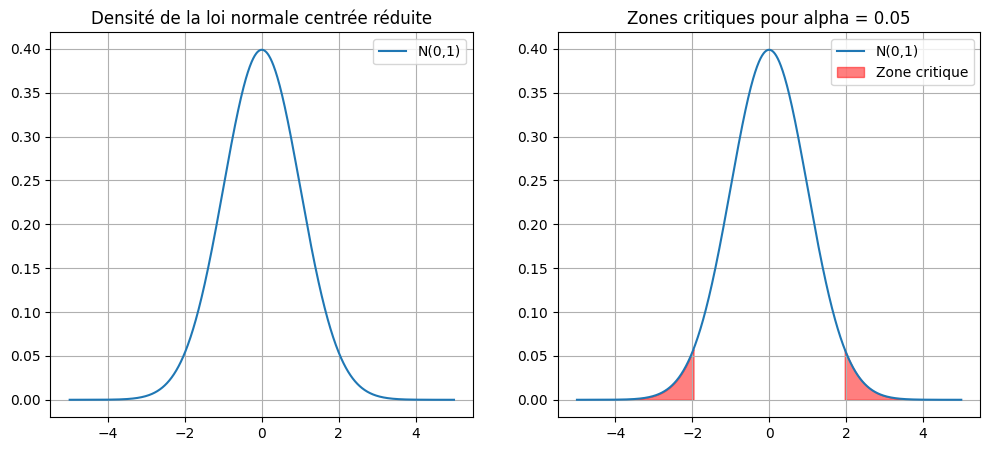

In [ ]:
# Affichage des quantiles critiques pour plusieurs niveaux alpha
for alpha in [0.01, 0.05, 0.1]:
    xcritic = st.norm.ppf(alpha / 2)
    print(f"alpha={alpha} => quantile critique inférieur : {xcritic:.5f}")

# Définition de l'axe x et calcul de la densité de la loi normale N(0,1)
x = np.linspace(-5, 5, 1000)
y = st.norm.pdf(x)

alpha = 0.05
xcrit_low = st.norm.ppf(alpha / 2)       # Quantile critique inférieur
xcrit_high = st.norm.ppf(1 - alpha / 2)  # Quantile critique supérieur

# Création d'une figure avec 2 subplots côte à côte
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Premier subplot : courbe normale simple
axes[0].plot(x, y, label='N(0,1)')
axes[0].set_title("Densité de la loi normale centrée réduite")
axes[0].grid()
axes[0].legend()

# Deuxième subplot : courbe normale + zones critiques coloriées
axes[1].plot(x, y, label='N(0,1)')
# Zone critique à gauche
sel_low = x < xcrit_low
axes[1].fill_between(x[sel_low], y[sel_low], 0, color='red', alpha=0.5, label='Zone critique')
# Zone critique à droite
sel_high = x > xcrit_high
axes[1].fill_between(x[sel_high], y[sel_high], 0, color='red', alpha=0.5)
axes[1].set_title(f"Zones critiques pour alpha = {alpha}")
axes[1].grid()
axes[1].legend()

plt.show()

Une fois l'IC trouvé sur $Z_n$, reste à revenir à $\bar{X_n}$ en isolant $\mu$

$$ IC_{1-\alpha}(\mu) = \big[ \bar{X_n} - z_{1-\alpha/2}\frac{\sigma}{\sqrt n} ; \bar{X_n} + z_{1-\alpha/2}\frac{\sigma}{\sqrt{n}} \big]
$$
Pour $\alpha = 0.05$,  la valeur critique $z_{1-\alpha/2} \approx 1.96$.

L'intervalle de confiance dépend alors que de $\alpha, n, \sigma$:
- plus $n$ augmente, plus l'intervalle se réduit autour de la valeur estimée.
- plus $\sigma$ est grand plus il est difficile d'avoir une estimation certaine car le processus sous-jacent est lui-même incertain.


In [ ]:
# Estimons la moyenne à partir d'un échantillon de n=30 valeurs
# Calculons l'intervalle de confiance
# Comptons le nombre de fois où l'intervalle de confiance est faux lors de T=10000 répétions
# Calculons le pourcentage d'erreur

n = 30
alpha = 0.05
xcritic = st.norm.ppf(1 - alpha/2)

# Affichons une première moyenne et écart-type sur un échantillon
samples = np.random.randn(n)
mu = samples.mean()
sigma = samples.std()

print(f"Moyenne estimée sur un échantillon (mu) : {mu:.4f}")
print(f"Ecart-type estimé sur un échantillon (sigma) : {sigma:.4f}")
print(f"Valeur critique (z_{{1-alpha/2}}) : {xcritic:.6f}")

T = 10000
IC = np.zeros((T, 2))
contain_true_mu = 0
true_mu = 0  # moyenne vraie de la loi N(0,1)

for i in range(T):
    samples = np.random.randn(n)
    mu_est = samples.mean()
    sigma_est = samples.std()

    lower_bound = mu_est - xcritic * sigma_est / np.sqrt(n)
    upper_bound = mu_est + xcritic * sigma_est / np.sqrt(n)
    IC[i] = [lower_bound, upper_bound]

    if lower_bound <= true_mu <= upper_bound:
        contain_true_mu += 1

error_rate = 1 - contain_true_mu / T

print(f"Taux d'erreur empirique sur {T} répétitions : {error_rate:.4%}")

Moyenne estimée sur un échantillon (mu) : 0.0981
Ecart-type estimé sur un échantillon (sigma) : 1.0256
Valeur critique (z_{1-alpha/2}) : 1.959964
Taux d'erreur empirique sur 10000 répétitions : 6.0000%


Le résultat de ce calcul est important car il permet de bien interpréter le sens de l'interval de confiance.


## Mais la variance n'est pas connue !
- Comment procéder ? Quelle loi utiliser ?
- A partir d'un échantillon de $n=10$, calculer le nouvel interval de confiance.  

Lorsque la variance de la population est inconnue, il n'est plus possible d'utiliser la loi normale pour construire un intervalle de confiance.

En effet, l'estimation de la variance à partir de l'échantillon ajoute une incertitude supplémentaire. Pour tenir compte de cette incertitude, on utilise la **loi de Student** (ou loi t de Student), qui dépend des degrés de liberté $ n-1 $.

L'intervalle de confiance pour la moyenne $\mu$ devient alors :

$$ IC_{1-\alpha}(\mu) = \left[\bar{X}_n - t_{1-\frac{\alpha}{2}, n-1} \frac{S}{\sqrt{n}} \quad ; \quad \bar{X}_n + t_{1-\frac{\alpha}{2}, n-1} \frac{S}{\sqrt{n}} \right] $$

où :
- $\bar{X}_n$ est la moyenne empirique de l’échantillon,
- $S$ est l'écart-type corrigé de l’échantillon (avec $n-1$ degrés de liberté),
- $t_{1-\frac{\alpha}{2}, n-1}$ est la valeur critique de la loi de Student à $n-1$ degrés de liberté.

In [ ]:
n = 10
alpha = 0.05
T = 10000

t_crit = st.t.ppf(1 - alpha/2, df=n-1)  # quantile de Student

true_mu = 0  # moyenne vraie de la population N(0,1)
contain_true_mu = 0

for _ in range(T):
    samples = np.random.randn(n)
    mu_est = samples.mean()
    sigma_est = samples.std(ddof=1)  # écart-type corrigé (n-1)

    lower_bound = mu_est - t_crit * sigma_est / np.sqrt(n)
    upper_bound = mu_est + t_crit * sigma_est / np.sqrt(n)

    if lower_bound <= true_mu <= upper_bound:
        contain_true_mu += 1

error_rate = 1 - contain_true_mu / T

print(f"Valeur critique Student (t_{{1-alpha/2,{n-1}}}): {t_crit:.4f}")
print(f"Taux d'erreur empirique avec loi de Student : {error_rate:.4%}")

Valeur critique Student (t_{1-alpha/2,9}): 2.2622
Taux d'erreur empirique avec loi de Student : 5.1500%




# Analyse statistique de données
Cet exercice nécessite les fichiers de données suivant (à télécharger sur moodle): `dataA.txt`.  


Dans son [article fondateur sur la régression](http://www.stat.ucla.edu/~nchristo/statistics100C/history_regression.pdf), Francis Galton a étudié les tailles moyennes
de 205 couples ainsi que celles de leurs enfants. Nous nous intéressons ici aux tailles des parents seulement. Ces tailles, exprimées en pouces, sont fournies dans le fichier  `dataA.txt` (la première colonne correspond aux pères, la seconde aux mères).



In [ ]:
data = np.loadtxt("dataA.txt") # modifier le chemin si nécessaire

Explorons ces données.
- Afficher les histogrammes des tailles des pères et des mères.
- Afficher également les histogrammes cumulés.
- Une autre manière de visualiser les données est de regarder les "boîtes à moustaches" ou `boxplot`. Cette fonction existe dans matplotlib. Regarder la documentation et utiliser là. Comprendre les quantités en présence.  
- Trouver les fonctions permettant de calculer les estimations de l’espérance mathématique, de la variance, et de l’écart-type de la distribution des tailles.
- Trouver aussi les estimateurs biaisés de la variance et de l’écart-type.
- Trouver également les fonctions fournissant les coefficients d’asymétrie et d’aplatissement (idem, il en existe des versions biaisées et non biaisées). Vérifier la cohérence de leurs valeurs avec les histogrammes.



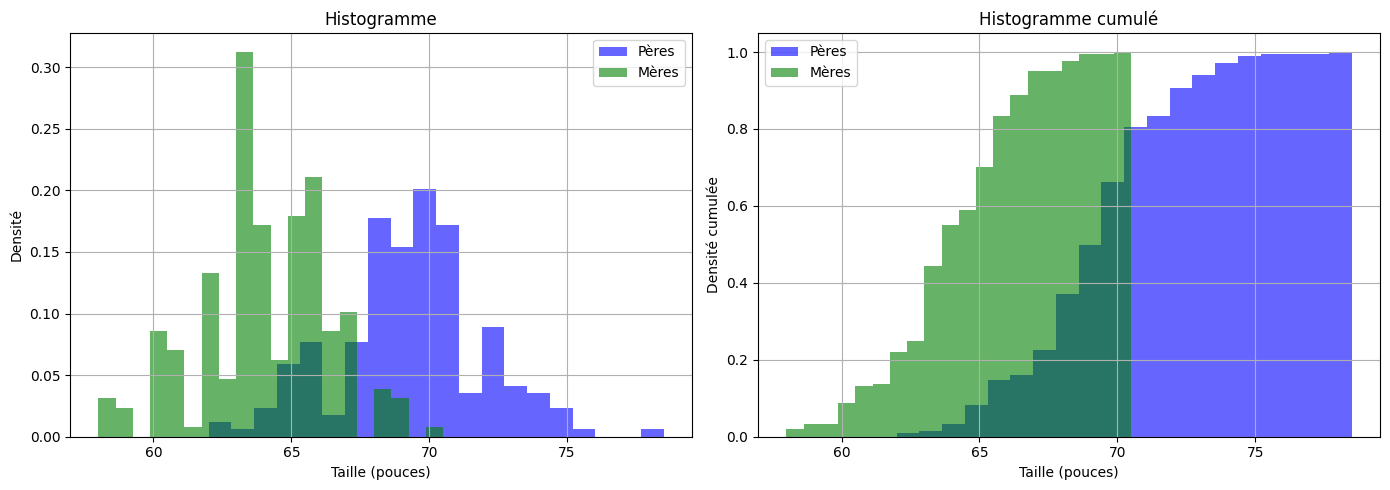

=== Statistiques descriptives ===

Moyenne des tailles des pères : 69.32
Moyenne des tailles des mères : 64.00

Variance (non biaisée) des pères : 7.01
Variance (non biaisée) des mères : 5.44

Écart-type (non biaisé) des pères : 2.65
Écart-type (non biaisé) des mères : 2.33

Variance (biaisée) des pères : 6.97
Variance (biaisée) des mères : 5.42

Écart-type (biaisé) des pères : 2.64
Écart-type (biaisé) des mères : 2.33

Asymétrie (skewness) non biaisée des pères : 0.01
Asymétrie (skewness) non biaisée des mères : -0.18
Asymétrie (skewness) biaisée des pères : 0.01
Asymétrie (skewness) biaisée des mères : -0.18

Aplatissement (kurtosis) non biaisé des pères : 0.41
Aplatissement (kurtosis) non biaisé des mères : -0.02
Aplatissement (kurtosis) biaisé des pères : 0.37
Aplatissement (kurtosis) biaisé des mères : -0.05


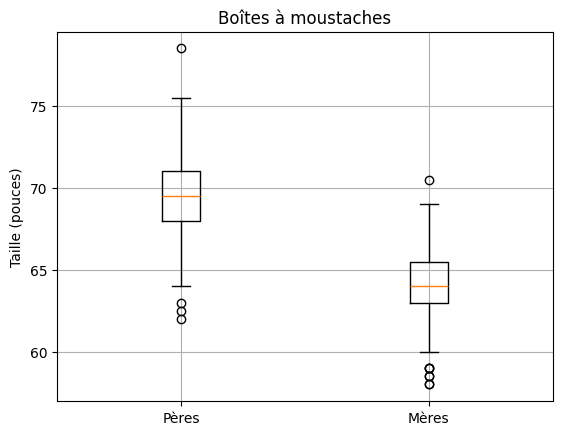

In [ ]:
# Chargement des données
data = np.loadtxt("dataA.txt")  # Adapter le chemin si nécessaire
pères = data[:, 0]
mères = data[:, 1]

# Création d'un subplot avec 3 graphes côte à côte
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Histogramme superposé
axs[0].hist(pères, bins=20, alpha=0.6, color='blue', label='Pères', density=True)
axs[0].hist(mères, bins=20, alpha=0.6, color='green', label='Mères', density=True)
axs[0].set_title("Histogramme")
axs[0].set_xlabel("Taille (pouces)")
axs[0].set_ylabel("Densité")
axs[0].legend()
axs[0].grid(True)

# Histogramme cumulé superposé
axs[1].hist(pères, bins=20, cumulative=True, alpha=0.6, color='blue', label='Pères', density=True)
axs[1].hist(mères, bins=20, cumulative=True, alpha=0.6, color='green', label='Mères', density=True)
axs[1].set_title("Histogramme cumulé")
axs[1].set_xlabel("Taille (pouces)")
axs[1].set_ylabel("Densité cumulée")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

# Boîtes à moustaches
plt.boxplot([pères, mères], tick_labels=['Pères', 'Mères'])
plt.title("Boîtes à moustaches")
plt.ylabel("Taille (pouces)")
plt.grid(True)

# Statistiques descriptives
print("=== Statistiques descriptives ===\n")

# Moyennes
print(f"Moyenne des tailles des pères : {np.mean(pères):.2f}")
print(f"Moyenne des tailles des mères : {np.mean(mères):.2f}")

# Variance non biaisée (ddof=1)
print(f"\nVariance (non biaisée) des pères : {np.var(pères, ddof=1):.2f}")
print(f"Variance (non biaisée) des mères : {np.var(mères, ddof=1):.2f}")

# Écart-type non biaisé
print(f"\nÉcart-type (non biaisé) des pères : {np.std(pères, ddof=1):.2f}")
print(f"Écart-type (non biaisé) des mères : {np.std(mères, ddof=1):.2f}")

# Variance biaisée (ddof=0)
print(f"\nVariance (biaisée) des pères : {np.var(pères, ddof=0):.2f}")
print(f"Variance (biaisée) des mères : {np.var(mères, ddof=0):.2f}")

# Écart-type biaisé
print(f"\nÉcart-type (biaisé) des pères : {np.std(pères, ddof=0):.2f}")
print(f"Écart-type (biaisé) des mères : {np.std(mères, ddof=0):.2f}")

# Asymétrie
print(f"\nAsymétrie (skewness) non biaisée des pères : {skew(pères, bias=False):.2f}")
print(f"Asymétrie (skewness) non biaisée des mères : {skew(mères, bias=False):.2f}")
print(f"Asymétrie (skewness) biaisée des pères : {skew(pères, bias=True):.2f}")
print(f"Asymétrie (skewness) biaisée des mères : {skew(mères, bias=True):.2f}")

# Aplatissement
print(f"\nAplatissement (kurtosis) non biaisé des pères : {kurtosis(pères, bias=False):.2f}")
print(f"Aplatissement (kurtosis) non biaisé des mères : {kurtosis(mères, bias=False):.2f}")
print(f"Aplatissement (kurtosis) biaisé des pères : {kurtosis(pères, bias=True):.2f}")
print(f"Aplatissement (kurtosis) biaisé des mères : {kurtosis(mères, bias=True):.2f}")

# Test de conformité

Le  test nommé *chi-square goodness-of-fit test* détermine si un échantillon de données peut être considéré comme issu d'une distribution de probabilité dont les paramètres pourraient être estimés à partir des observations.  Le test regroupe les données selon des groupes et calcul les comptes observés et attendus (selon la distribution hypothèse). Ici on part de l'histogramme, les groupes peuvent se déduire donc de l'histogramme surtout si on a défini nous-même les intervalles. Puis les effectifs sont comparés grâce à la loi du $\chi^2$:

$$\chi^2=\sum_{i=1}^{N} \frac{(O_i−E_i)^2}{E_i} ,$$

avec $O_i$ les comptes observés et $E_i$ les comptes attendus. La statistique de test suit alors une loi du $\chi^2$ quand les comptes sont suffisants. Notons que la convergence de la distribution du $\chi^2$ est asymptotique mais, en pratique, l’approximation est correcte si $E_i \geq 5\ \ \forall i$.


Pour tester la conformité des données (les deux colonnes) vis-à-vis d'une distribution gaussienne:  

- On peut appliquer à l'histogramme un test du $\chi^2$. Quelles sont les grandeurs que l'on veut comparer ? Comment les calculer ? Représenter ces grandeurs graphiquement.
- Tester le caractère gaussien des deux distributions à l’aide du test de $\chi^2$ de conformité à une distribution. Il faut faire attention à comment on choisit les intervalles !
- Tracer et interpréter les diagrammes quantile-quantile des distributions.
- Calculer la droite de Henri.

=== Test χ² pour Pères ===
Statistique χ² : 7.39
Degrés de liberté : 4
p-value : 0.1165
→ On ne rejette pas H0 (gaussien)
=== Test χ² pour Mères ===
Statistique χ² : 25.89
Degrés de liberté : 5
p-value : 0.0001
→ On rejette H0 (non gaussien)


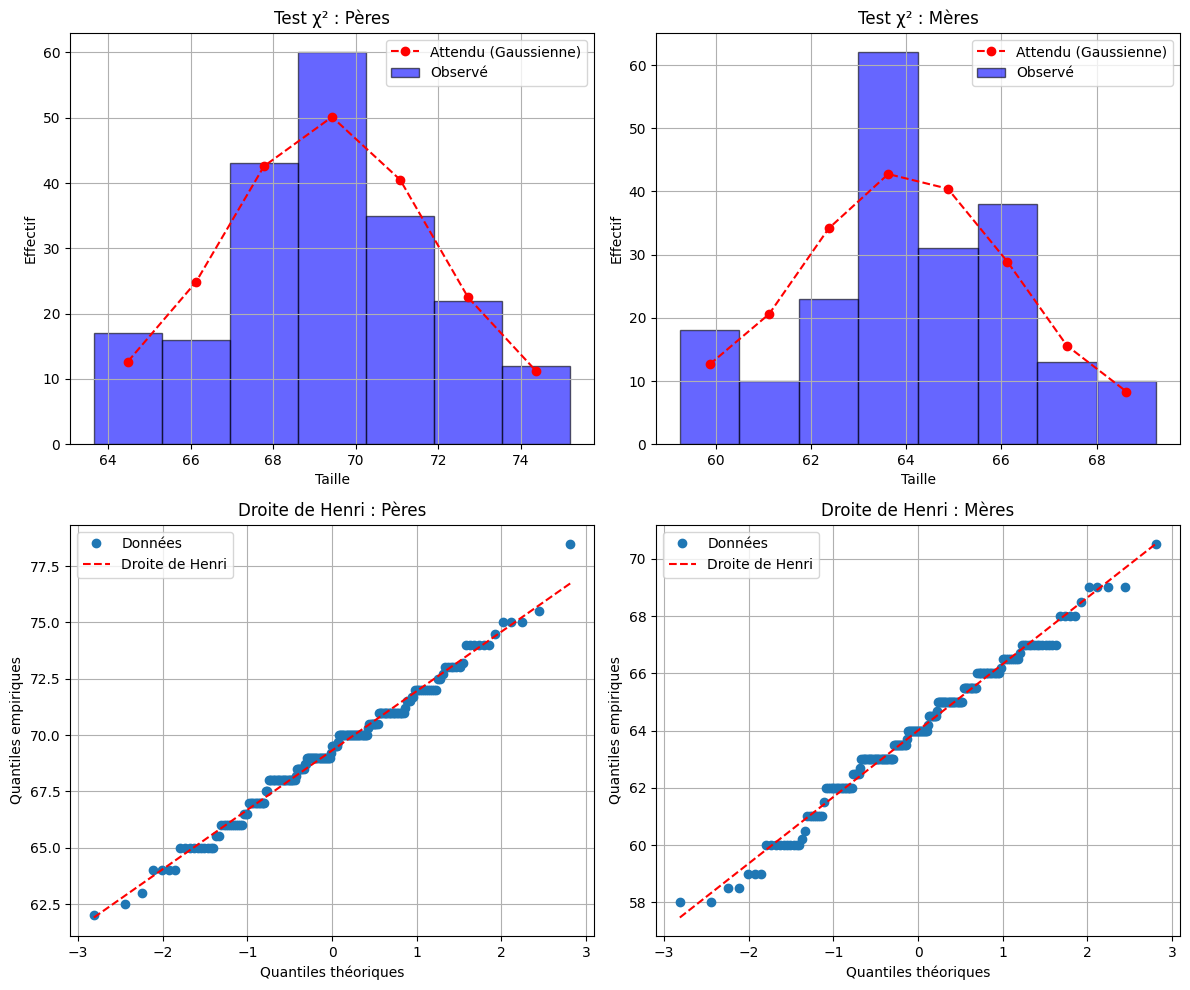

In [ ]:
data = np.loadtxt("dataA.txt")
peres = data[:, 0]
meres = data[:, 1]

def merge_bins(O, E, bins):
    """Fusionne classes aux extrémités si Ei < 5"""
    O = O.copy()
    E = E.copy()
    bins = bins.copy()
    # Fusion à gauche
    while len(E) > 1 and E[0] < 5:
        E[1] += E[0]
        O[1] += O[0]
        E = E[1:]
        O = O[1:]
        bins = bins[1:]
    # Fusion à droite
    while len(E) > 1 and E[-1] < 5:
        E[-2] += E[-1]
        O[-2] += O[-1]
        E = E[:-1]
        O = O[:-1]
        bins = bins[:-1]
    return O, E, bins

def chi2_test_gaussienne(data, nbins=10, nom=""):
    N = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)

    # Bins de largeur constante
    min_d, max_d = np.min(data), np.max(data)
    bins = np.linspace(min_d, max_d, nbins + 1)

    # Comptes observés
    O, _ = np.histogram(data, bins=bins)

    # Comptes attendus selon loi normale
    E = []
    for i in range(len(bins) - 1):
        a, b = bins[i], bins[i + 1]
        Pi = norm.cdf(b, mean, std) - norm.cdf(a, mean, std)
        Ei = N * Pi
        E.append(Ei)
    E = np.array(E)

    # Fusionner les bins aux extrémités si Ei < 5
    O, E, bins = merge_bins(O, E, bins)

    # Statistique chi2
    chi_stat = np.sum((O - E) ** 2 / E)
    ddl = len(O) - 1 - 2  # -2 pour moyenne et écart-type estimés
    p_value = 1 - chi2.cdf(chi_stat, ddl)

    print(f"=== Test χ² pour {nom} ===")
    print(f"Statistique χ² : {chi_stat:.2f}")
    print(f"Degrés de liberté : {ddl}")
    print(f"p-value : {p_value:.4f}")
    print("→", "On rejette H0 (non gaussien)" if p_value < 0.05 else "On ne rejette pas H0 (gaussien)")

    # Centres des bins (après fusion)
    centers = (bins[:-1] + bins[1:]) / 2
    width = bins[1] - bins[0]

    return centers, O, E, width, data

# Affichage subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
for ax_row in axs:
    for ax in ax_row:
        ax.grid(True)

def plot_hist(ax, centers, O, E, width, nom):
    ax.bar(centers, O, width=width, alpha=0.6, label="Observé", color="blue", edgecolor="black")
    ax.plot(centers, E, 'ro--', label="Attendu (Gaussienne)")
    ax.set_title(f"Test χ² : {nom}")
    ax.set_xlabel("Taille")
    ax.set_ylabel("Effectif")
    ax.legend()

def plot_henri(ax, data, nom):
    sorted_data = np.sort(data)
    n = len(data)
    proba = (np.arange(1, n + 1) - 0.5) / n
    theor = norm.ppf(proba)
    ax.plot(theor, sorted_data, 'o', label="Données")
    slope, intercept = np.polyfit(theor, sorted_data, 1)
    ax.plot(theor, slope * theor + intercept, 'r--', label="Droite de Henri")
    ax.set_title(f"Droite de Henri : {nom}")
    ax.set_xlabel("Quantiles théoriques")
    ax.set_ylabel("Quantiles empiriques")
    ax.legend()


# Calculs + affichage
results_peres = chi2_test_gaussienne(peres, nom="Pères")
results_meres = chi2_test_gaussienne(meres, nom="Mères")

plot_hist(axs[0, 0], *results_peres[:4], nom="Pères")
plot_henri(axs[1, 0], results_peres[4], nom="Pères")

plot_hist(axs[0, 1], *results_meres[:4], nom="Mères")
plot_henri(axs[1, 1], results_meres[4], nom="Mères")

plt.tight_layout()
plt.show()


Nous avons déterminé que l'un des deux (ou les deux ?) échantillons provenaient d'une distribution gaussienne. Commençons par calculer les intervalles de confiance des deux moyennes pour comparer ces deux estimateurs. Puis, en utilisant le test de student pour déterminer si les moyennes des distributions sont différentes, ou pas:
- Construire les intervalles de confiance des deux moyennes (avec degrés de confiance 0.95).
- Préalablement au test de student, déterminer si les variances des deux distributions sont égales.
- Effectuer le test de student ou welch avec $$H_0: \mu_1 = \mu_2$$.

In [ ]:
# Données
data = np.loadtxt("dataA.txt")
peres = data[:, 0]
meres = data[:, 1]

def intervalle_confiance_moyenne(data, alpha=0.05):
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    t_val = t.ppf(1 - alpha/2, df=n-1)
    marge = t_val * std / np.sqrt(n)
    return mean, marge

# Calcul des moyennes et marges d’erreur
mean_peres, marge_peres = intervalle_confiance_moyenne(peres)
mean_meres, marge_meres = intervalle_confiance_moyenne(meres)


# 1. Intervalles de confiance des moyennes
ic_peres = intervalle_confiance_moyenne(peres)
ic_meres = intervalle_confiance_moyenne(meres)

print(f"Intervalle de confiance 95% moyenne pères : {ic_peres}")
print(f"Intervalle de confiance 95% moyenne mères : {ic_meres}")

# 2. Test d'égalité des variances (Levene)
stat_levene, p_levene = levene(peres, meres)
print(f"\nTest de Levene (égalité des variances) : stat={stat_levene:.3f}, p={p_levene:.4f}")
if p_levene < 0.05:
    print("→ Variances différentes (on rejette H0)")
    equal_var = False
else:
    print("→ Variances égales (on ne rejette pas H0)")
    equal_var = True

# 3. Test t (Student ou Welch selon résultat du test de Levene)
stat_t, p_t = ttest_ind(peres, meres, equal_var=equal_var)
print(f"\nTest t (comparaison des moyennes) : stat={stat_t:.3f}, p={p_t:.4f}")
if p_t < 0.05:
    print("→ Moyennes significativement différentes (on rejette H0)")
else:
    print("→ Pas de différence significative entre les moyennes (on ne rejette pas H0)")


Intervalle de confiance 95% moyenne pères : (np.float64(69.3160975609756), np.float64(0.3645364225043477))
Intervalle de confiance 95% moyenne mères : (np.float64(64.00195121951221), np.float64(0.3212742143354615))

Test de Levene (égalité des variances) : stat=1.918, p=0.1668
→ Variances égales (on ne rejette pas H0)

Test t (comparaison des moyennes) : stat=21.563, p=0.0000
→ Moyennes significativement différentes (on rejette H0)


# Hypercholestérolémie primaire en monothérapie
Une étude randomisée en double aveugle contre placebo a été menée sur 827 patients traités à l’hypocholestérolémiant, et 892 patients auxquels a été administré un placebo. Pour chaque patient, on a mesuré la variation du taux de cholestérol LDL (Low Density Lipoprotein, ou mauvais cholestérol) entre le début et la fin du
traitement. Les résultats sont les suivants :

|   | traitement | placebo |
|---|------------|---------|
| effectifs F | 428   | 502  |
| effectifs H | 399  | 390  |
|   25-44 ans |  162    |  210 |
| 45-64 ans  | 403|423 |
| sup 65 ans  | 262 | 259 |
| $\sum$ des variations | – 528.4477 | -116.0837 |
| $\sum$ des écarts | 76.1925 | 35.8899 |


Pour la somme des variations et des écarts:
$$ \sum_k \delta_k \text{ en g/l et } \sum_k (\delta_k-\bar{\delta})^2$$


## Cohorte
Préalablement à l’étude statistique proprement dite, on souhaite s’assurer que les deux échantillons sont équilibrés entre eux, à la fois en âge et en sexe. Effectuer les tests adéquats. Pour tous les tests, que l’on effectuera avec un risque d’erreur de première espèce α = 5%, on explicitera les hypothèses non remises en question, l’hypothèse nulle et l’hypothèse alternative.


Puis calculer les estimations ponctuelles de l’espérance mathématique (e.m.), de la variance et de l’écart-type de la variation du taux de cholestérol LDL dans les deux groupes.

Test du khi² d'indépendance pour le sexe :
  Statistique χ² = 3.358, ddl = 1, p-value = 0.0669
  → Pas de rejet de H0 : les distributions sont similaires entre groupes.

  Table attendue sous H0 :
[[447.41710297 482.58289703]
 [379.58289703 409.41710297]]

Test du khi² d'indépendance pour l'âge :
  Statistique χ² = 4.243, ddl = 2, p-value = 0.1198
  → Pas de rejet de H0 : les distributions sont similaires entre groupes.

  Table attendue sous H0 :
[[178.96684119 193.03315881]
 [397.38336242 428.61663758]
 [250.64979639 270.35020361]]

Estimations ponctuelles de la variation du taux LDL :

Traitement : moyenne = -0.6390 g/l, variance = 0.092243, écart-type = 0.3037 g/l
Placebo   : moyenne = -0.1301 g/l, variance = 0.040280, écart-type = 0.2007 g/l


<ipython-input-32-b4890e2d87ee>:48: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([variation_traitement, variation_placebo], labels=['Traitement', 'Placebo'])


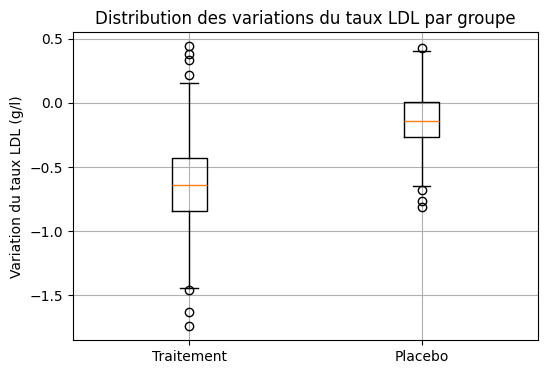

In [ ]:
sexe_data = np.array([[428, 502], [399, 390]])
age_data = np.array([[162, 210], [403, 423], [262, 259]])

def test_chi2_independence(table, nom_variable):
    print(f"Test du khi² d'indépendance pour {nom_variable} :")
    chi2, p, dof, expected = chi2_contingency(table)
    print(f"  Statistique χ² = {chi2:.3f}, ddl = {dof}, p-value = {p:.4f}")
    if p < 0.05:
        print("  → Rejet de H0 : les distributions sont différentes entre groupes.\n")
    else:
        print("  → Pas de rejet de H0 : les distributions sont similaires entre groupes.\n")
    print("  Table attendue sous H0 :")
    print(expected)
    print()

# Lancer les tests
test_chi2_independence(sexe_data, "le sexe")
test_chi2_independence(age_data, "l'âge")

# Calcul des estimations ponctuelles pour la variation LDL
# Données fournies :
# somme des variations : traitement = -528.4477, placebo = -116.0837
# somme des écarts (∑(δk - δ̄)^2) : traitement = 76.1925, placebo = 35.8899
effectifs_traitement = 827
effectifs_placebo = 892

# Moyennes
mean_traitement = -528.4477 / effectifs_traitement
mean_placebo = -116.0837 / effectifs_placebo

# Variances
var_traitement = 76.1925 / (effectifs_traitement - 1)
var_placebo = 35.8899 / (effectifs_placebo - 1)

# Écarts-types
std_traitement = np.sqrt(var_traitement)
std_placebo = np.sqrt(var_placebo)

print("Estimations ponctuelles de la variation du taux LDL :\n")
print(f"Traitement : moyenne = {mean_traitement:.4f} g/l, variance = {var_traitement:.6f}, écart-type = {std_traitement:.4f} g/l")
print(f"Placebo   : moyenne = {mean_placebo:.4f} g/l, variance = {var_placebo:.6f}, écart-type = {std_placebo:.4f} g/l")

# Boxplots variation LDL
variation_traitement = np.random.normal(loc=mean_traitement, scale=std_traitement, size=effectifs_traitement)
variation_placebo = np.random.normal(loc=mean_placebo, scale=std_placebo, size=effectifs_placebo)

plt.figure(figsize=(6, 4))
plt.boxplot([variation_traitement, variation_placebo], labels=['Traitement', 'Placebo'])
plt.ylabel("Variation du taux LDL (g/l)")
plt.title("Distribution des variations du taux LDL par groupe")
plt.grid(True)
plt.show()

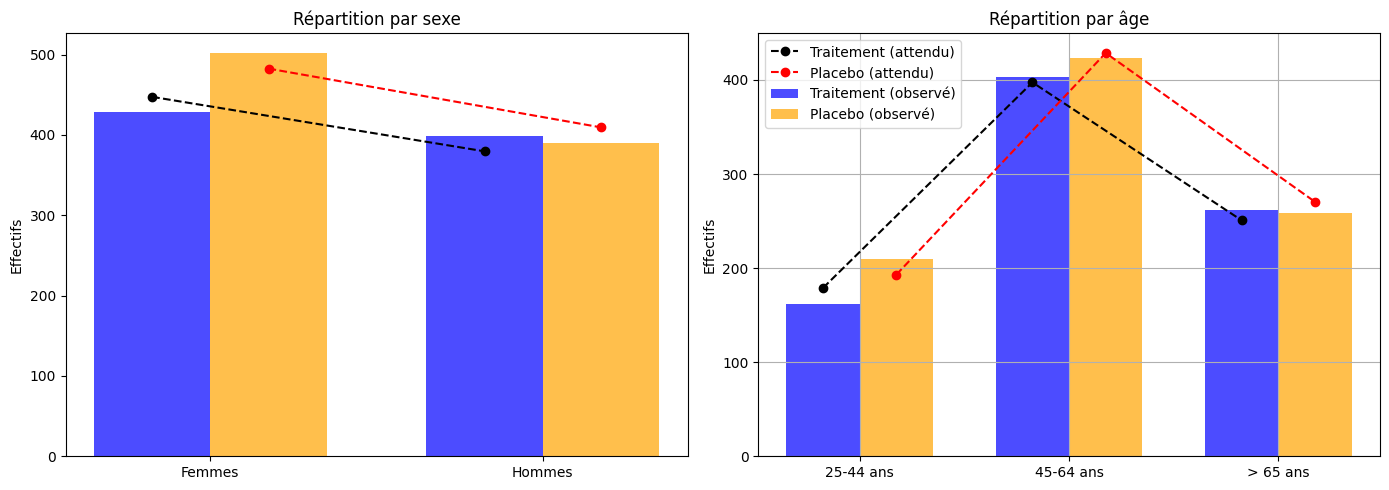

In [ ]:
# Données observées
obs_sexe = np.array([[428, 502], [399, 390]])
obs_age = np.array([[162, 210], [403, 423], [262, 259]])

# Données attendues sous H0
att_sexe = np.array([[447.42, 482.58], [379.58, 409.42]])
att_age = np.array([[178.97, 193.03], [397.38, 428.62], [250.65, 270.35]])

labels_sexe = ['Femmes', 'Hommes']
labels_age = ['25-44 ans', '45-64 ans', '> 65 ans']
x_sexe = np.arange(len(labels_sexe))
x_age = np.arange(len(labels_age))
width = 0.35

# Création des subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sexe
axes[0].bar(x_sexe - width/2, obs_sexe[:, 0], width, label='Traitement (observé)', color='blue', alpha=0.7)
axes[0].bar(x_sexe + width/2, obs_sexe[:, 1], width, label='Placebo (observé)', color='orange', alpha=0.7)
axes[0].plot(x_sexe - width/2, att_sexe[:, 0], 'o--', color='black', label='Traitement (attendu)')
axes[0].plot(x_sexe + width/2, att_sexe[:, 1], 'o--', color='red', label='Placebo (attendu)')
axes[0].set_title("Répartition par sexe")
axes[0].set_xticks(x_sexe)
axes[0].set_xticklabels(labels_sexe)
axes[0].set_ylabel("Effectifs")

# Âge
axes[1].bar(x_age - width/2, obs_age[:, 0], width, label='Traitement (observé)', color='blue', alpha=0.7)
axes[1].bar(x_age + width/2, obs_age[:, 1], width, label='Placebo (observé)', color='orange', alpha=0.7)
axes[1].plot(x_age - width/2, att_age[:, 0], 'o--', color='black', label='Traitement (attendu)')
axes[1].plot(x_age + width/2, att_age[:, 1], 'o--', color='red', label='Placebo (attendu)')
axes[1].set_title("Répartition par âge")
axes[1].set_xticks(x_age)
axes[1].set_xticklabels(labels_age)
axes[1].legend()
axes[1].set_ylabel("Effectifs")
axes[1].grid(True)

plt.tight_layout()
plt.show()


## Efficacité

 Déterminer, en conduisant le(s) test(s) adéquat(s), si l’hypocholestérolémiant est plus efficace que le placebo pour ce type de patients.

 Donner des estimations ponctuelle et par intervalle (au seuil de confiance 5%) de l’écart entre la diminution obtenue avec le traitement et celle obtenue avec le placebo.

In [ ]:
# Données extraites du tableau brut
n1, S1, SC1 = 827, -528.4477, 76.1925
n2, S2, SC2 = 892, -116.0837, 35.8899

# Moyennes
m1 = S1 / n1
m2 = S2 / n2
delta = m1 - m2

# Variances
v1 = SC1 / (n1 - 1)
v2 = SC2 / (n2 - 1)

# Erreur standard
se = np.sqrt(v1 / n1 + v2 / n2)

# Intervalle de confiance à 95 %
z_critical = norm.ppf(0.975)
ci_lower = delta - z_critical * se
ci_upper = delta + z_critical * se

# Statistique de test et p-value (test unilatéral gauche)
z_stat = delta / se
p_value = norm.cdf(z_stat)

# Affichage des résultats
print("Estimation ponctuelle de la différence des moyennes :", f"{delta:.4f} g/L")
print(f"Intervalle de confiance à 95% : [{ci_lower:.4f}, {ci_upper:.4f}] g/L")
print(f"Statistique de test Z : {z_stat:.4f}")
print(f"p-value : {p_value:.8f}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("→ Le test est significatif : le traitement est plus efficace que le placebo.")
else:
    print("→ Le test n'est pas significatif : on ne peut pas conclure que le traitement est plus efficace.")


Estimation ponctuelle de la différence des moyennes : -0.5089 g/L
Intervalle de confiance à 95% : [-0.5334, -0.4843] g/L
Statistique de test Z : -40.6504
p-value : 0.00000000
→ Le test est significatif : le traitement est plus efficace que le placebo.
